# **SME0142 - Álgebra Linear e Aplicações**
Docente: Cynthia de Oliveira Lage Ferreira


# **Trabalho Prático**
Outubro de 2025

# Aluno:
Beatriz Alves dos Santos - 15588630

Jhonatan Barboza da Silva - 15645049

# Orientações Gerais

*   Esta avaliação é **individual ou em dupla** e deverá ser desenvolvida na plataforma Colab (https://colab.research.google.com/).

*   Cada aluno/dupla deverá produzir um arquivo .ipynb contendo as soluções dos exercícios. Sejam organizados !

*   Os arquivos deverão estar identificados por **NOMEDOALUNO1NoUSP-NOMEDOALUNO2NoUSP.ipynb** a fim de facilitar a organização das atividades pela professora.

*  Os arquivos deverão ser enviados **até às 20h do dia 18/10/2025** através da plataforma e-disciplinas da USP (https://edisciplinas.usp.br/). **Os arquivos recebidos por e-mail não serão corrigidos.** Arquivos enviados fora do prazo também não serão corrigidos!

*   Apenas os alunos que estiverem com a **situação regularizada no Sistema Jupiter** terão suas avaliações corrigidas.

*  Todos os códigos utilizados para resolver os problemas deverão ser apresentados, executados e minimamente comentados. **Questões com respostas sem justificativas não serão consideradas.**

**BOM TRABALHO!**

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import spacy

# **Exercício 1**
Considere o espaço vetorial real $\mathbb{R}^2$. Sejam as transformações
- $T_1:\mathbb{R}^2 \to \mathbb{R}^2$ tal que $T_1(x,y)=(-x,y)$ - **reflexão em torno do eixo $oy$**;
- $T_2:\mathbb{R}^2 \to \mathbb{R}^2$ tal que a matriz da transformação é dada por
$$[T_2] = \begin{bmatrix} 1 & k \\ 0 & 1 \end{bmatrix},$$
com $k\in\mathbb{R}$ - **cisalhamento horizontal**.

a) Aplique as transformações $T_1$ e $T_2$ no quadrado de vértices $(0,0)$, $(1,0)$, $(1,1)$ e $(0,1)$ considerando o parâmetro $k= -0,5$ e visualize os resultados.

b) Determine a matriz da transformação $T_3$ que primeiro faz um cisalhamento horizontal com $k=-0.5$ mapeando $e_2$ em $e_2 - 0.5e_1$ ($e_1$ se mantém inalterado) e então reflete o resultado em torno do eixo $oy$. **Dica:** Determine a posição final das imagens de $e_1$ e $e_2$.

c) Qual a relação entre as matrizes $[T_1]$, $[T_2]$ e a matriz da transformação $[T_3]$ obtida no item anterior?

d) Determine a transformação de reflexão em torno do eixo $ox$ e a transformação de cisalhamento vertical.

Text(0.5, 1.0, 'Cisalhamento')

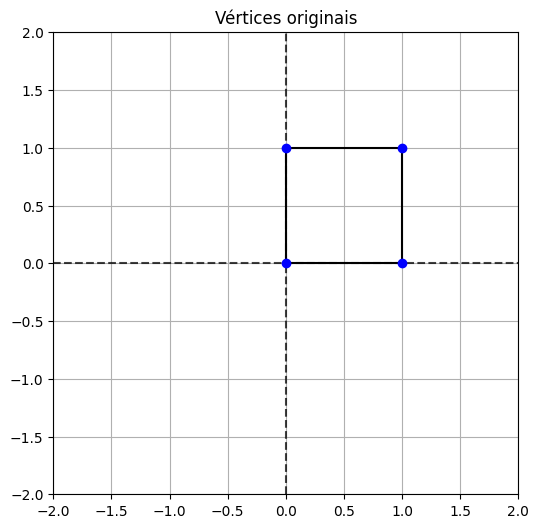

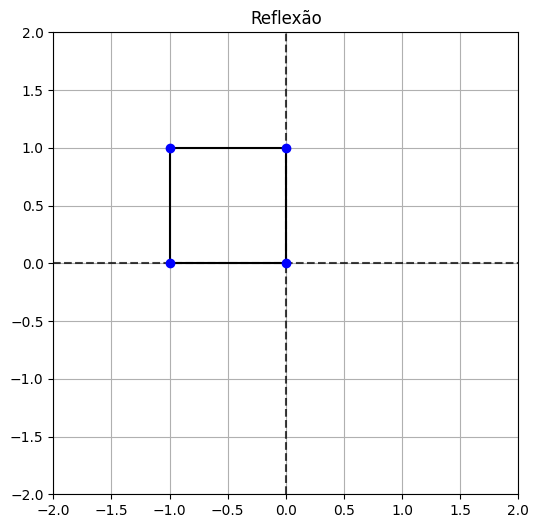

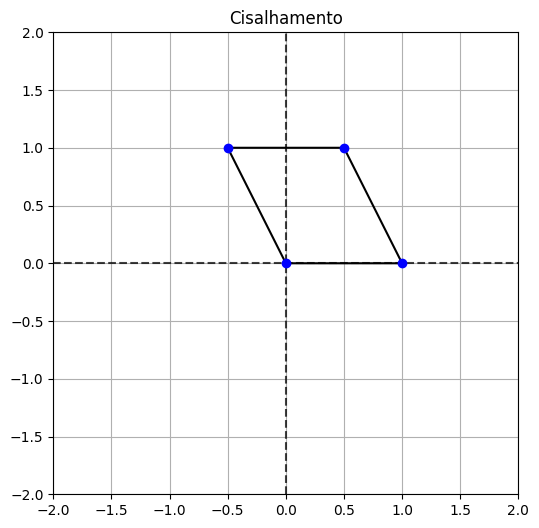

In [72]:
# ============================================
# a) Aplique as transformações T1 e T2 no quadrado
# ============================================

# Vértices do quadrado

Q = np.array([[0,0],[1,0],[1,1],[0,1]]).T
k = -0.5

# Reflexão em torno do eixo y
# (-x,y) = x(-1,0) + y(0,1)
T1 = np.array([[-1,0],[0,1]])

# Cisalhamento horizontal
T2 = np.array([[1,k],[0,1]])

# Aplicando as transformações
T1Q = T1 @ Q
T2Q = T2 @ Q

# Plots
def plotSimples(vx, vy):
  plt.figure(figsize=(6,6))
  plt.axis([-2, 2, -2, 2])
  plt.plot([-2,2], [0,0], 'k--', alpha=0.75)
  plt.plot([0,0], [-2,2],'k--', alpha=0.75)
  plt.plot(vx, vy, 'k')
  plt.plot([vx[0], vx[-1]], [vy[0], vy[-1]], 'k')
  plt.plot(vx, vy, 'bo')
  plt.grid('True')

plotSimples(Q[0,:], Q[1,:])
plt.title('Vértices originais')

plotSimples(T1Q[0,:], T1Q[1,:])
plt.title('Reflexão')

plotSimples(T2Q[0,:], T2Q[1,:])
plt.title('Cisalhamento')

Text(0.5, 1.0, 'Cisalhamento vertical')

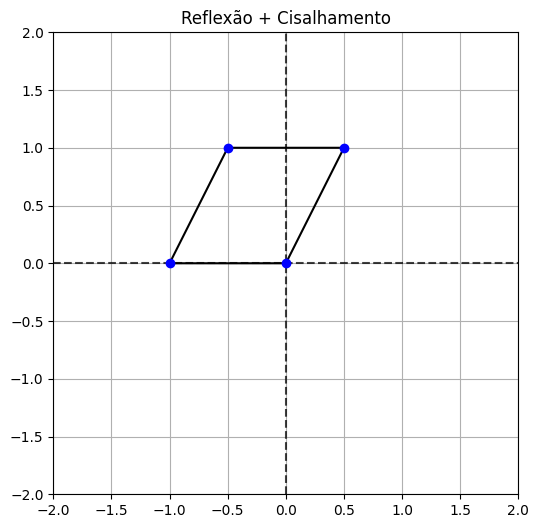

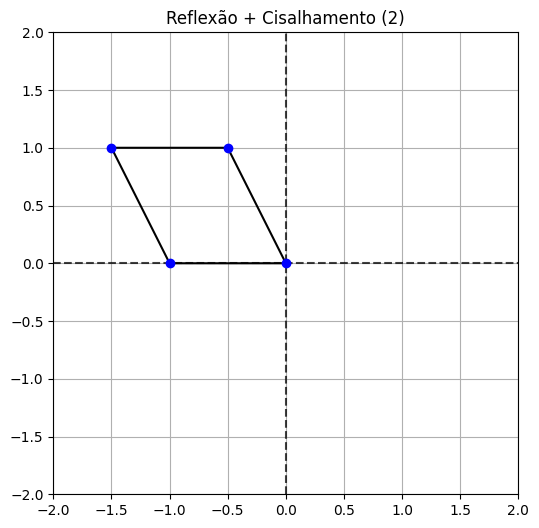

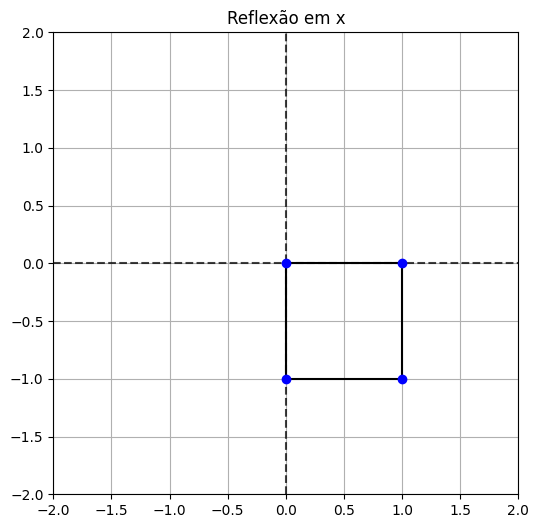

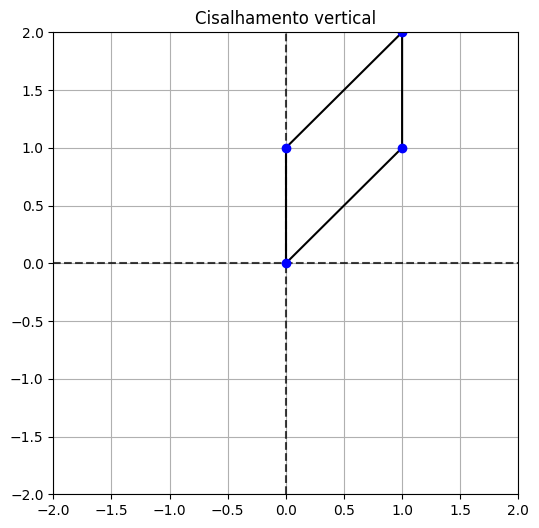

In [73]:
# ============================================
# b) Determine a matriz da transformação T3 que primeiro faz um cisalhamento horizontal
# ============================================

# Observando as posições finais de e1 e e2 temos:
# T3(1,0) = (-1,0)
# T3(0,1) = (0.5,1)
T3 = np.array([[-1,0.5],[0,1]])
T3Q = T3 @ Q
plotSimples(T3Q[0,:], T3Q[1,:])
plt.title('Reflexão + Cisalhamento')

# ============================================
# c) Qual a relação entre as matrizes [T1], [T2] e a matriz da transformação [T3]
# ============================================

# Por outro lado, aplicando T1, depois T2, temos:
# T3b(1,0) = T2(T1(1,0)) = T2(-1,0) = (-1,0)
# T3b(0,1) = T2(T1(0,1)) = T2(0,1) = (0.5,1)
# Logo, T3b = T2 @ T1
# Assim sendo, T3b != T3 pois a ordem das operações importa.
T3b = T2 @ T1
T3bQ = T3b @ Q
plotSimples(T3bQ[0,:], T3bQ[1,:])
plt.title('Reflexão + Cisalhamento (2)')

# ============================================
# d) Determine a transformação de reflexão em torno do eixo ox e a transformação de cisalhamento vertical.
# ============================================

# Reflexão em torno do eixo x
# (x,-y) = x(1,0) + y(0,-1)
T4 = np.array([[1,0],[0,-1]])

# Cisalhamento vertical
# (x,y) -> (x, x+y) = x(1,1) + y(0,1)
T5 = np.array([[1,0],[1,1]])

# Aplicando as transformações
T4Q = T4 @ Q
T5Q = T5 @ Q

# Plots
plotSimples(T4Q[0,:], T4Q[1,:])
plt.title('Reflexão em x')

plotSimples(T5Q[0,:], T5Q[1,:])
plt.title('Cisalhamento vertical')

# **Exercício 2**
Considere a transformação $T:R^7 \rightarrow R^3$ linear dada pela matriz

$$
\left(\begin{array}{ccccccc}
3 & 9 & 6 & 6 & 9 & 3 & 1\\
2 & 0 & 9 & 2 & 0 & 5 & 3\\
0 & 0 & 1 & 0 & 1 & 0 & 2
\end{array}\right)
$$

a) Qual a dimensão do núcleo e da imagem da transformação? Faça um código para determinar a dimensão da imagem e conclua, então, a dimensão do núcleo.

b) Encontre uma base para o espaço núcleo.

c) Faça um código para verificar que a base encontrada está gerando o núcleo.

In [74]:
# ============================================
# a) Determinar a dimensão da imagem de B (Im(B)) e a dimensão do núcleo de B (ker(B))
# ============================================


# Teorema do Núcleo e da Imagem: dim(ker(B)) + dim(Im(B)) = dim(B)
# dim(B) = R⁷ -> dim 7
# dim(Im(B)) = posto(B) = número de linhas linearmente independentes
# dim(ker(B)) = 7 - posto(B)
B = np.asarray([[3, 9, 6, 6, 9, 3, 1],
                [2, 0, 9, 2, 0, 5, 3],
                [0, 0, 1 , 0, 1, 0, 2]])
posto_B = np.linalg.matrix_rank(B)
dim_Im_B = posto_B
dim_Nuc_B = B.shape[1] - posto_B

print("="*60)
print("a) DIMENÇÃO DA IMAGEM E DO KERNEL: ")
print("="*60)
print(f"dim(Im(B)) = {dim_Im_B}")
print(f"dim(ker(B)) = {dim_Nuc_B}")

# ============================================
#b) Encontrar uma base para o ker(B)
# ============================================

import sympy
print("");
print("="*60)
print(" b) ENCONTRAR A BASE PARA KER(B)")
print("="*60)

# Passo 1: Definir a matriz da transformação T
A = sympy.Matrix([
    [3, 9, 6, 6, 9, 3, 1],
    [2, 0, 9, 2, 0, 5, 3],
    [0, 0, 1, 0, 1, 0, 2]
])

# Passo 2: Calcular a Forma Escalonada Reduzida por Linhas (RREF)
# A função .rref() retorna a matriz RREF e os índices das colunas pivô
rref_matrix, pivot_columns = A.rref()

# Passo 3: Identificar as variáveis livres
# O número de colunas é a dimensão do espaço de partida (R^7)
num_columns = A.shape[1]
all_columns_indices = set(range(num_columns))
pivot_columns_indices = set(pivot_columns)
free_columns_indices = sorted(list(all_columns_indices - pivot_columns_indices))

# Passo 4: Construir os vetores da base do núcleo
# Para cada variável livre, criamos um vetor da base.
null_space_basis = []
for free_col in free_columns_indices:
    # Cria um vetor zerado do tamanho correto (7x1)
    basis_vector = sympy.zeros(num_columns, 1)

    # Define o valor da variável livre atual como 1
    basis_vector[free_col] = 1

    # Calcula o valor das variáveis pivô em função desta variável livre
    # O valor da variável pivô na linha 'i' é o negativo do valor na
    # coluna da variável livre na matriz RREF.
    for i, pivot_col in enumerate(pivot_columns):
        basis_vector[pivot_col] = -rref_matrix[i, free_col]

    null_space_basis.append(basis_vector)

# Passo 5: Exibir a base encontrada
print("Uma base para o núcleo é formada pelos seguintes vetores:")
for i, vector in enumerate(null_space_basis):
    print(f"\n--- Vetor {i+1} ---\n")
    sympy.pprint(vector)

# ============================================
# c) verificar se a base encontrada gera o ker(B)
# ============================================

# Para verificar se os vetores encontrados realmente geram o núcleo, podemos multiplicar a matriz B por cada vetor da base e verificar se o resultado é o vetor nulo.
print("");
print("="*60)
print(" c) VERIFICAR SE GERA KER(B)")
print("="*60)
print("\nVerificação:")
for i, vector in enumerate(null_space_basis):
    result = A * vector
    print(f"\nB * Vetor {i+1}:")
    sympy.pprint(result)
    if all(val == 0 for val in result):
        print("Resultado é o vetor nulo. Vetor pertence ao núcleo.")
    else:
        print("Resultado não é o vetor nulo. Vetor não pertence ao núcleo.")

a) DIMENÇÃO DA IMAGEM E DO KERNEL: 
dim(Im(B)) = 3
dim(ker(B)) = 4

 b) ENCONTRAR A BASE PARA KER(B)
Uma base para o núcleo é formada pelos seguintes vetores:

--- Vetor 1 ---

⎡ -1 ⎤
⎢    ⎥
⎢-1/3⎥
⎢    ⎥
⎢ 0  ⎥
⎢    ⎥
⎢ 1  ⎥
⎢    ⎥
⎢ 0  ⎥
⎢    ⎥
⎢ 0  ⎥
⎢    ⎥
⎣ 0  ⎦

--- Vetor 2 ---

⎡ 9/2 ⎤
⎢     ⎥
⎢-11/6⎥
⎢     ⎥
⎢ -1  ⎥
⎢     ⎥
⎢  0  ⎥
⎢     ⎥
⎢  1  ⎥
⎢     ⎥
⎢  0  ⎥
⎢     ⎥
⎣  0  ⎦

--- Vetor 3 ---

⎡-5/2⎤
⎢    ⎥
⎢1/2 ⎥
⎢    ⎥
⎢ 0  ⎥
⎢    ⎥
⎢ 0  ⎥
⎢    ⎥
⎢ 0  ⎥
⎢    ⎥
⎢ 1  ⎥
⎢    ⎥
⎣ 0  ⎦

--- Vetor 4 ---

⎡15/2⎤
⎢    ⎥
⎢-23 ⎥
⎢────⎥
⎢ 18 ⎥
⎢    ⎥
⎢ -2 ⎥
⎢    ⎥
⎢ 0  ⎥
⎢    ⎥
⎢ 0  ⎥
⎢    ⎥
⎢ 0  ⎥
⎢    ⎥
⎣ 1  ⎦

 c) VERIFICAR SE GERA KER(B)

Verificação:

B * Vetor 1:
⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦
Resultado é o vetor nulo. Vetor pertence ao núcleo.

B * Vetor 2:
⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦
Resultado é o vetor nulo. Vetor pertence ao núcleo.

B * Vetor 3:
⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦
Resultado é o vetor nulo. Vetor pertence ao núcleo.

B * Vetor 4:
⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦
Resultado é o vetor nulo. Vetor pertence a

# **Exercício 3**

a) Dada uma base qualquer de um subespaço vetorial do $R^{n}$, escreva um código para encontrar uma base ortonormal para este subespaço. Teste o seu código para a base dada pelas colunas da matriz  **V**  gerada no código abaixo.

b) Faça um teste para verificar que a base obtida é de fato ortonormal.

In [75]:
# Gera uma matriz aleatória V com 20 linhas e 10 colunas (20 vetores em R^10)
# Para o propósito de ortonormalizar os 10 vetores-coluna, vamos usar uma matriz 20x10
# Onde cada uma das 10 colunas é um vetor de 20 dimensões.
V = np.random.randint(0, 20, size=(20, 10))
print("Matriz Original V (colunas são os vetores a serem ortonormalizados):\n")
print(V)

# ============================================
# a) Encontrar uma base ortonormal para o subespaço gerado pelas colunas de V
# ============================================

# Utilizar o processo de Gram-Schmidt para encontrar uma base ortogonal e depois normalizar os vetores para obter uma base ortonormal.

def gram_schmidt(vectors):
    rows, n_vectors = vectors.shape
    orthonormal_basis = np.zeros_like(vectors, dtype=float)
    for i in range(n_vectors):
        v = vectors[:, i].astype(float)
        # Subtrair as projeções nos vetores da base ortonormal já encontrados
        for j in range(i):
            u_j = orthonormal_basis[:, j]
            # Projeção de v sobre u_j
            proj = np.dot(v, u_j) * u_j
            v = v - proj
        # Normalizar para obter o próximo vetor da base ortonormal
        norm = np.linalg.norm(v)
        if norm > 1e-10:
            orthonormal_basis[:, i] = v / norm
        else:
            print(f"Aviso: Vetor {i+1} é (ou tornou-se) nulo. Pode indicar dependência linear.")
    return orthonormal_basis

# ============================================
# b) Teste que verifica se a base obtida é de fato ortonormal
# ============================================

# Utilizar o produto interno para verificar se os vetores são unitários e ortogonais entre si.
    # Verifica a matriz identidade: Q^T * Q = I
    # Compara a matriz resultante com a identidade, elemento a elemento,
    # usando uma tolerância para lidar com erros de ponto flutuante.
def is_orthonormal(basis, tolerance=1e-10):
    n = basis.shape[1]
    identity = np.identity(n)
    qTq = np.dot(basis.T, basis)
    return np.allclose(qTq, identity, atol=tolerance)

Matriz Original V (colunas são os vetores a serem ortonormalizados):

[[ 5  0 10 17  8 19  4  4  1  7]
 [15 12 16 16 10 11 18 18  8 17]
 [ 6 19 17 18 18 11  5  8  3  2]
 [15 15 14 15  3  1 11 13 12  0]
 [19  7  4  1  1  5  4  1  8 10]
 [16 17  3  7 10  8  0 17 10 16]
 [16  9 18  0 11 10  9 13 14 18]
 [17 15  8  9  3 13  5 11 13  3]
 [11 11  2  1 18 16 15 11 13  5]
 [16 13 12 14 16 16 17  9  6 15]
 [19 13  8 15  1  8  3  8  6 19]
 [ 6  2  1 18  8 18  4 12  0 11]
 [19  0  4 16 15 17 19 17  0  8]
 [16 16 15  4 16 18 15  6 13 15]
 [14 14  3 13  0  6  4  4  8 16]
 [19  7 12 14 10 11 19 13  1  7]
 [12  1 19 15 18  4  3  5  7 19]
 [ 4 11  3 13 16  9 10  9 13  1]
 [16  9 13 12 18 12  6  3 19  6]
 [14 18 13  0  6 13 18 16 15  4]]


In [76]:
# ============================================
# a) Ortonormalização da base V
# ============================================

Q = gram_schmidt(V)
print("");
print("="*60)
print("a) MATRIZ Q COM A BASE ORTONORMAL RESULTANTE:")
print("="*60)
print(Q)

# ============================================
# b) Teste que verifica se a base obtida é de fato ortonormal
# ============================================

result = is_orthonormal(Q)
print("");
print("="*60)
print(f"b) A BASE Q É ORTONORMAL:")
print("="*60)
print(f"{result}")



a) MATRIZ Q COM A BASE ORTONORMAL RESULTANTE:
[[ 0.07685035 -0.12220631  0.28695348  0.3199137  -0.0698831   0.53713957
  -0.20163071 -0.08223836  0.10526193 -0.06943306]
 [ 0.23055106  0.05452026  0.21640664  0.09957268 -0.14811638  0.00406596
   0.3412033   0.22080397  0.0678019   0.35448217]
 [ 0.09222042  0.52015615  0.32833429  0.25078092  0.0957494  -0.08967496
  -0.14864489 -0.05732461 -0.48251057 -0.31638858]
 [ 0.23055106  0.15980506  0.11074949  0.09550452 -0.35775268 -0.30048092
   0.25813406  0.09670429  0.27169107 -0.28718163]
 [ 0.29203134 -0.21871945 -0.24058897 -0.23999486 -0.10824615 -0.07307839
  -0.16656871 -0.28313538 -0.05414788 -0.09561346]
 [ 0.24592113  0.20555367 -0.33362473 -0.01378373  0.13912709 -0.2105565
  -0.36680487  0.49696256 -0.19928137  0.06850517]
 [ 0.24592113 -0.0752058   0.30551274 -0.41242736  0.02231102  0.09545258
  -0.15414692  0.33335146  0.08319076  0.17492321]
 [ 0.2612912   0.11092254 -0.14417782 -0.02956192 -0.20355806  0.20950704
  -0.

# **Exercício 4**


Considere a seguinte rede não direcionada composta por 12 nós, com conexões definidas pela matriz de adjacência abaixo (os nós estão numerados de 1 a 12).

A rede foi construída com o objetivo de evidenciar a diferença entre duas medidas de centralidade: **centralidade de grau** e **centralidade de autovalor**.

### **Matriz de Adjacência**

A matriz a seguir é referente a rede considerada. Um valor $1$ na posição $(i,j)$ indica uma conexão entre os nós $i$ e $j$; $0$ indica ausência de conexão.



A =
\begin{bmatrix}
0 & 1 & 1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
1 & 0 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
1 & 1 & 0 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
1 & 1 & 1 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
1 & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 1 & 1 & 1 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
\end{bmatrix}







Com base na estrutura da rede acima, realize as seguintes tarefas:

    

a)   Calcule a centralidade de grau para cada nó. Liste os nós com maior centralidade de grau.

b)   Calcule a centralidade de autovalor para cada nó. Liste os nós com maior centralidade de autovalor.

c)   Há nós com alta centralidade de grau mas baixa centralidade de autovalor? Justifique com base na estrutura da rede.


d)   Há nós com baixa centralidade de grau mas alta centralidade de autovalor? Explique o motivo.

e)   Discuta as diferenças entre as duas centralidades à luz dos resultados obtidos.




    
    
    
    













TABELA DE CENTRALIDADES
 Nó  Grau  Autovalor
  1     5   0.465278
  2     4   0.430214
  3     4   0.430214
  4     4   0.430214
  5     4   0.430214
  6     7   0.178173
  7     1   0.043654
  8     1   0.043654
  9     1   0.043654
 10     1   0.043654
 11     1   0.043654
 12     1   0.043654


a) CENTRALIDADE DE GRAU
Nós com maior grau (7 conexões):
  - Nó 6


b) CENTRALIDADE DE AUTOVALOR
Top 5 nós com maior centralidade de autovalor:
  - Nó 1: 0.4653
  - Nó 2: 0.4302
  - Nó 3: 0.4302
  - Nó 4: 0.4302
  - Nó 5: 0.4302


c) ALTA CENTRALIDADE DE GRAU, BAIXA DE AUTOVALOR
SIM, o Nó 6 é o exemplo perfeito:
  - Grau: 7 (máximo)
  - Autovalor: 0.1782 (baixo)

Motivo:
  O Nó 6 conecta-se aos Nós 7-12, que são periféricos (grau 1).
  Centralidade de autovalor considera a importância dos vizinhos,
  não apenas a quantidade. Vizinhos periféricos = baixa centralidade.


d) BAIXA CENTRALIDADE DE GRAU, ALTA DE AUTOVALOR
NÃO. Nesta rede não há nós com essa característica.
Os Nós 7-12 têm grau bai

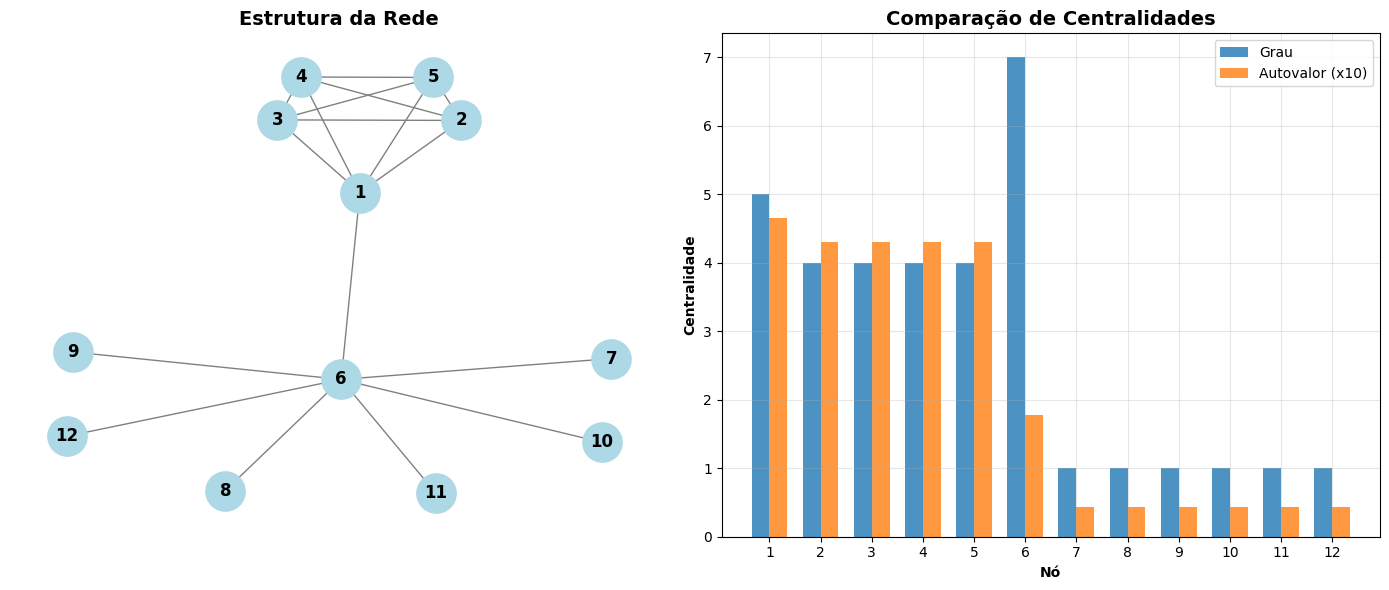

In [77]:
# Matriz de adjacência
A = np.array([
    [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
    [1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
])

# Criar grafo
G = nx.from_numpy_array(A)

# a) Centralidade de Grau
degree_cent = dict(G.degree())

# b) Centralidade de Autovalor
eigen_cent = nx.eigenvector_centrality(G)

# Criar DataFrame com resultados
df = pd.DataFrame({
    'Nó': range(1, 13),
    'Grau': [degree_cent[i] for i in range(12)],
    'Autovalor': [eigen_cent[i] for i in range(12)]
})

print("="*60)
print("TABELA DE CENTRALIDADES")
print("="*60)
print(df.to_string(index=False))
print("\n")


# ============================================
# a) Nós com maior centralidade de grau
# ============================================

print("="*60)
print("a) CENTRALIDADE DE GRAU")
print("="*60)

# Encontra o maior valor da coluna 'Grau' no DataFrame (ou seja, o nó com mais conexões)
# Filtra o DataFrame para pegar apenas os nós que têm esse grau máximo
# Exibe quantas conexões (grau) o(s) nó(s) com maior centralidade possuem
# Percorre as linhas filtradas e imprime o identificador de cada nó com o grau máximo

max_degree = df['Grau'].max()
high_degree = df[df['Grau'] == max_degree]
print(f"Nós com maior grau ({int(max_degree)} conexões):")
for _, row in high_degree.iterrows():
    print(f"  - Nó {int(row['Nó'])}")
print("\n")


# ============================================
# b) Nós com maior centralidade de autovalor
# ============================================

print("="*60)
print("b) CENTRALIDADE DE AUTOVALOR")
print("="*60)

# Ordena o DataFrame 'df' pela coluna 'Autovalor' em ordem decrescente
# (os nós com maior centralidade de autovalor ficam no topo)
# Imprime um título explicativo sobre o que será exibido
# Percorre as 5 primeiras linhas do DataFrame ordenado
# Exibe o número do nó e seu respectivo valor de autovalor formatado com 4 casas decimais

df_sorted = df.sort_values('Autovalor', ascending=False)
print("Top 5 nós com maior centralidade de autovalor:")
for _, row in df_sorted.head(5).iterrows():
    print(f"  - Nó {int(row['Nó'])}: {row['Autovalor']:.4f}")
print("\n")


# ============================================
# c) Alta centralidade de grau, baixa de autovalor
# ============================================

print("="*60)
print("c) ALTA CENTRALIDADE DE GRAU, BAIXA DE AUTOVALOR")
print("="*60)

print("SIM, o Nó 6 é o exemplo perfeito:")
print(f"  - Grau: {int(df.loc[5, 'Grau'])} (máximo)")
print(f"  - Autovalor: {df.loc[5, 'Autovalor']:.4f} (baixo)")
print("\nMotivo:")
print("  O Nó 6 conecta-se aos Nós 7-12, que são periféricos (grau 1).")
print("  Centralidade de autovalor considera a importância dos vizinhos,")
print("  não apenas a quantidade. Vizinhos periféricos = baixa centralidade.")
print("\n")

# ============================================
# d) Baixa centralidade de grau, alta de autovalor
# ============================================

print("="*60)
print("d) BAIXA CENTRALIDADE DE GRAU, ALTA DE AUTOVALOR")
print("="*60)
print("NÃO. Nesta rede não há nós com essa característica.")
print("Os Nós 7-12 têm grau baixo (1) e autovalor muito baixo.")
print("\n")

# ============================================
# e) Discussão
# ============================================

print("="*60)
print("e) DIFERENÇAS ENTRE AS CENTRALIDADES")
print("="*60)
print("CENTRALIDADE DE GRAU:")
print("  - Mede apenas QUANTIDADE de conexões")
print("  - Medida local (vizinhança imediata)")
print("")
print("CENTRALIDADE DE AUTOVALOR:")
print("  - Mede QUALIDADE das conexões")
print("  - Considera importância dos vizinhos (medida recursiva)")
print("")
print("OBSERVAÇÕES NESTA REDE:")
print("  - Nós 1-5: Formam grupo denso → alto grau E alto autovalor")
print("  - Nó 6: Alto grau, mas vizinhos periféricos → baixo autovalor")
print("  - Nós 7-12: Grau 1, conectados a nó pouco central → baixo autovalor")
print("")
print("CONCLUSÃO: 'Quantidade ≠ Qualidade'")
print("="*60)

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Grafo (com labels de 1 a 12)
pos = nx.spring_layout(G, seed=42)
labels = {i: i+1 for i in range(12)}
nx.draw(G, pos, labels=labels, with_labels=True, node_color='lightblue',
        node_size=800, font_size=12, font_weight='bold',
        edge_color='gray', ax=axes[0])
axes[0].set_title('Estrutura da Rede', fontsize=14, fontweight='bold')

# Comparação de centralidades
x = df['Nó']
width = 0.35
axes[1].bar(x - width/2, df['Grau'], width, label='Grau', alpha=0.8)
axes[1].bar(x + width/2, df['Autovalor']*10, width, label='Autovalor (x10)', alpha=0.8)
axes[1].set_xlabel('Nó', fontweight='bold')
axes[1].set_ylabel('Centralidade', fontweight='bold')
axes[1].set_title('Comparação de Centralidades', fontsize=14, fontweight='bold')
axes[1].set_xticks(range(1, 13))
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# **Exerício 5**

Em um cenário onde um analista de dados possui uma coleção de documentos textuais de natureza variada — como notícias, publicações em redes sociais, ou descrições de produtos —, surge a necessidade de identificar automaticamente os **principais temas ou tópicos** abordados nesses textos. Tal tarefa é especialmente relevante em contextos onde os dados são não rotulados e o volume de documentos inviabiliza a análise manual.


**Objetivo:**
Dado um conjunto de 10 manchetes de notícias, aplicar **Análise Semântica Latente (LSA) via SVD** para identificar **temas comuns** (conceitos latentes) e analisar a relevância de palavras e documentos.

---

# **Conjunto de manchetes**

1. Time vence campeonato nacional
2. Jogador é destaque na vitória do time
3. Equipe perde final em jogo equilibrado
4. Treinador elogia desempenho da equipe
5. Jogador marca gol decisivo no campeonato
6. Time reage e vence partida importante
7. Jogador lidera equipe rumo à final
8. Equipe conquista vitória histórica
9. Treinador anuncia substituição estratégica
10. Jogador decide jogo com gol de empate
11. Bolsa de valores sobe após anúncio econômico
12. Mercado financeiro reage a nova política fiscal
13. Inflação preocupa investidores e governo
14. Governo anuncia medidas para controlar inflação
15. Mercado de ações fecha em alta
16. Valores da bolsa aumentam com relatório positivo
17. Investidores reagem à decisão do banco central
18. Política econômica impacta mercado financeiro
19. Inflação e desemprego influenciam investidores
20. Governo divulga plano fiscal detalhado



**Procedimento matemático**

 **Representação:**

   * Construir uma **matriz termo-documento** $A \in \mathbb{R}^{m \times 10}$, com linhas correspondendo a **palavras relevantes** (substantivos e verbos de ação) e colunas aos documentos.
   * Cada elemento $a_{ij}$ indica a presença ou frequência da palavra $i$ no documento $j$.

 **Decomposição SVD:**
   $
   A = U  \Sigma  V^T
   $

   * $U \in \mathbb{R}^{m \times r}$: indica a participação das palavras nos conceitos latentes
   * $\Sigma \in \mathbb{R}^{r \times r}$: indica a importância de cada conceito
   * $V \in \mathbb{R}^{10 \times r}$: indica a participação dos documentos nos conceitos latentes
   * $r = \text{posto}(A)$


a) Qual é o tema dominante no conjunto de manchetes? Qual é secundário?

b) Quais palavras (substantivos ou verbos) são mais representativas de cada tema? Liste 5 de cada.

c) Quais são os 5 documentos mais representativas de cada tema?

d) Como os verbos de ação contribuiram para a distinção entre os temas?




In [78]:
# ============================================
# Instalar modelo spaCy para português
# ============================================
#!python -m spacy download pt_core_news_sm

# ============================================
# Importações
# ============================================
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD

# ============================================
# CONJUNTO DE 20 MANCHETES
# ============================================
# Dataset balanceado: 10 manchetes de esportes + 10 de economia
documents = [
    # Esportes
    "Time vence campeonato nacional",
    "Jogador é destaque na vitória do time",
    "Equipe perde final em jogo equilibrado",
    "Treinador elogia desempenho da equipe",
    "Jogador marca gol decisivo no campeonato",
    "Time reage e vence partida importante",
    "Jogador lidera equipe rumo à final",
    "Equipe conquista vitória histórica",
    "Treinador anuncia substituição estratégica",
    "Jogador decide jogo com gol de empate",
    # Economia
    "Bolsa de valores sobe após anúncio econômico",
    "Mercado financeiro reage a nova política fiscal",
    "Inflação preocupa investidores e governo",
    "Governo anuncia medidas para controlar inflação",
    "Mercado de ações fecha em alta",
    "Valores da bolsa aumentam com relatório positivo",
    "Investidores reagem à decisão do banco central",
    "Política econômica impacta mercado financeiro",
    "Inflação e desemprego influenciam investidores",
    "Governo divulga plano fiscal detalhado"
]

# ============================================
# a) LSA COM VOCABULÁRIO FIXO
# ============================================
# Define manualmente as palavras-chave mais relevantes de cada tema
vocabulary = [
    # Esportes
    "time", "jogador", "campeonato", "vitória", "equipe", "final", "jogo", "treinador", "gol",
    "vence", "marca", "perde", "reage", "decide", "conquista", "anuncia", "lidera", "substituição",
    # Economia
    "bolsa", "valores", "mercado", "financeiro", "inflação", "investidores", "governo",
    "sobe", "preocupa", "divulga", "impacta", "aumentam", "decisão", "plano"
]

# Cria matriz termo-documento usando apenas o vocabulário fixo
vectorizer_fixed = CountVectorizer(vocabulary=vocabulary)
A_fixed = vectorizer_fixed.fit_transform(documents)
terms_fixed = vectorizer_fixed.get_feature_names_out()

# Aplica LSA (redução de dimensionalidade) para extrair 2 temas latentes
k = 2  # dois temas esperados: esportes e economia
svd_fixed = TruncatedSVD(n_components=k, random_state=42)
lsa_fixed = svd_fixed.fit_transform(A_fixed)

print("="*60)
print("a) LSA com vocabulário fixo")
print("="*60)

# (a) Palavras mais importantes por tema
# Analisa os componentes principais para identificar termos mais relevantes
print("1) Palavras mais importantes por tema:")
n_top_words = 5
for i, topic in enumerate(svd_fixed.components_):
    # Ordena as palavras por peso no componente
    top_indices = topic.argsort()[-n_top_words:][::-1]
    top_words = [terms_fixed[j] for j in top_indices]
    print(f"Tema {i+1}: {', '.join(top_words)}")

# ============================================
# b) LSA COM PRÉ-PROCESSAMENTO via spaCy
# ============================================
print("")
print("="*60)
print("b) LSA com filtragem (substantivos + verbos)")
print("="*60)

# Carrega modelo de linguagem em português
nlp = spacy.load("pt_core_news_sm")

def filtrar_palavras(texto):
    """
    Pré-processa o texto: mantém apenas substantivos e verbos (lematizados)
    Remove palavras funcionais (artigos, preposições, etc.)
    """
    doc = nlp(texto.lower())
    return " ".join([t.lemma_ for t in doc if t.pos_ in {"NOUN", "VERB"}])

# Aplica pré-processamento em todas as manchetes
docs_filtradas = [filtrar_palavras(m) for m in documents]

# Cria nova matriz termo-documento com vocabulário automático (não fixo)
vectorizer = CountVectorizer()
A = vectorizer.fit_transform(docs_filtradas)
termos = vectorizer.get_feature_names_out()

# Aplica LSA novamente com os dados pré-processados
svd = TruncatedSVD(n_components=k, random_state=42)
svd.fit(A)

# Extrai e exibe as 10 palavras mais representativas de cada tema
temas_palavras = []
for i, comp in enumerate(svd.components_):
    termos_ordenados = [termos[idx] for idx in np.argsort(comp)[::-1]]
    temas_palavras.append(termos_ordenados[:10])
    print(f"Tema {i+1}: ")
    print("Palavras mais representativas:")
    print(", ".join(termos_ordenados[:10]))

# ============================================
# c) DOCUMENTOS MAIS RELEVANTES (item c)
# ============================================
# Transforma documentos no espaço reduzido (2D)
A_reduzido = svd.transform(A)
temas_df = pd.DataFrame(A_reduzido, columns=[f"Tema {i+1}" for i in range(k)])
temas_df["Manchete"] = documents

print("")
print("="*60)
print("c) Documentos mais relevantes por tema ")
print("="*60)

# Para cada tema, lista os 5 documentos com maior score
for i in range(k):
    print(f"\nTema {i+1} — 5 documentos mais representativos:\n")
    top_docs = temas_df.sort_values(f"Tema {i+1}", ascending=False)[["Manchete", f"Tema {i+1}"]].head(5)
    print(top_docs.to_string(index=False))

# ============================================
# d) ANÁLISE DOS VERBOS DE AÇÃO (item d)
# ============================================
print("")
print("="*60)
print("d) Análise dos verbos de ação")
print("="*60)

def extrair_verbos(lista_termos):
    """
    Filtra apenas os verbos de uma lista de termos
    Útil para análise semântica: verbos indicam ações características de cada tema
    """
    doc = nlp(" ".join(lista_termos))
    return [t.text for t in doc if t.pos_ == "VERB"]

# Identifica verbos principais de cada tema
verbos_tema1 = extrair_verbos(temas_palavras[0])
verbos_tema2 = extrair_verbos(temas_palavras[1])

print(f"Tema 1 — Verbos mais representativos: {', '.join(verbos_tema1)}")
print(f"Tema 2 — Verbos mais representativos: {', '.join(verbos_tema2)}")

# Interpretação automática baseada nos verbos encontrados
print("\n Interpretação:")
if len(verbos_tema1) > 0 and len(verbos_tema2) > 0:
    print(f"- Os verbos do Tema 1 ({', '.join(verbos_tema1)}) indicam **ações competitivas e dinâmicas**,")
    print("  típicas de notícias esportivas (ex.: vencer, marcar, decidir, reagir).")
    print(f"- Já os verbos do Tema 2 ({', '.join(verbos_tema2)}) remetem a **movimentos econômicos e decisões governamentais**,")
    print("  como subir, reagir, divulgar e impactar — características de manchetes financeiras e políticas.")
    print("\n Conclusão: Os **verbos de ação** são cruciais para distinguir os temas, pois capturam a natureza")
    print("  das mudanças e eventos descritos — vitórias e derrotas no esporte, versus reações e medidas na economia.")

a) LSA com vocabulário fixo
1) Palavras mais importantes por tema:
Tema 1: jogador, equipe, final, gol, jogo
Tema 2: inflação, governo, investidores, preocupa, anuncia

b) LSA com filtragem (substantivos + verbos)
Tema 1: 
Palavras mais representativas:
jogador, equipe, gol, jogo, time, campeonato, vitória, empate, decidir, marcar
Tema 2: 
Palavras mais representativas:
inflação, governo, investidor, anunciar, controlar, medida, preocupar, desemprego, influencir, detalhar

c) Documentos mais relevantes por tema 

Tema 1 — 5 documentos mais representativos:

                                Manchete   Tema 1
   Jogador decide jogo com gol de empate 1.537987
Jogador marca gol decisivo no campeonato 1.271271
      Jogador lidera equipe rumo à final 1.248089
   Jogador é destaque na vitória do time 1.172428
  Equipe perde final em jogo equilibrado 0.825175

Tema 2 — 5 documentos mais representativos:

                                       Manchete   Tema 2
Governo anuncia medidas para cont